# Analisa Pergerakan Nilai Tukar Mata Uang JPY / IDR Pada Tahun 2019

Nilai tukar mata uang Yen terhadap Rupiah bergerak fluktuatif dari hari ke hari. Pada tulisan ini akan ditampilkan history sekaligus analisa sederhana pergerakan mata uang JPY/IDR  spesifik pada tahun 2019

# Sumber Data
Sumber data yang akan digunakan diambil dari website https://monexnews.com/. Pengambilan data dilakukan dengan metode webscraping, sebuah metode pada python programming language untuk mengoleksi data dari halaman web.

Berikut adalah tahap-tahap yang dilakukan:

#### Menarik HTML dari halaman web

In [37]:
import requests
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

#### Membaca content HTML dan menyimpan dalam objek 'soup'

In [61]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


#### Menampilkan potongan content HTML yang sudah ditarik

In [73]:
print(soup.prettify()[:800])# menampilkan sebagian content

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>



#### Mengambil content tabel

In [62]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:200])# menampilkan sebagian content tabel

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>


In [60]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>]

#### Mengambil Informasi Tanggal,ASK dan BID dan diubah ke dalam tuple

In [69]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get bulan
    TANGGAL = row.find_all('td')[0].text
    TANGGAL = TANGGAL.strip() #for removing the excess whitespace
    
    #get ASK
    ASK = row.find_all('td')[1].text
    ASK = ASK.strip() #for removing the excess whitespace
    
    #get BID
    BID = row.find_all('td')[2].text
    BID = BID.strip() #for removing the excess whitespace
    
    temp.append((TANGGAL,ASK,BID)) 
    
temp

[('31\xa0Desember\xa02019', '128,62', '127,32'),
 ('30\xa0Desember\xa02019', '128,30', '127,02'),
 ('27\xa0Desember\xa02019', '128,11', '126,83'),
 ('26\xa0Desember\xa02019', '128,27', '126,98'),
 ('23\xa0Desember\xa02019', '128,39', '127,10'),
 ('20\xa0Desember\xa02019', '128,63', '127,34'),
 ('19\xa0Desember\xa02019', '128,24', '126,93'),
 ('18\xa0Desember\xa02019', '128,64', '127,32'),
 ('17\xa0Desember\xa02019', '128,62', '127,33'),
 ('16\xa0Desember\xa02019', '128,67', '127,36'),
 ('13\xa0Desember\xa02019', '128,30', '127,02'),
 ('12\xa0Desember\xa02019', '130,04', '128,71'),
 ('11\xa0Desember\xa02019', '129,65', '128,34'),
 ('10\xa0Desember\xa02019', '129,56', '128,26'),
 ('09\xa0Desember\xa02019', '129,76', '128,44'),
 ('06\xa0Desember\xa02019', '129,78', '128,45'),
 ('05\xa0Desember\xa02019', '130,10', '128,77'),
 ('04\xa0Desember\xa02019', '130,79', '129,45'),
 ('03\xa0Desember\xa02019', '130,15', '128,82'),
 ('02\xa0Desember\xa02019', '129,36', '128,04'),
 ('29\xa0November\xa

#### Mengurutkankan kembali ke data dari bulan terdahulu sampai bulan terakhir

In [70]:
temp = temp[::-1]
temp

[('02\xa0Januari\xa02019', '132,89', '131,54'),
 ('03\xa0Januari\xa02019', '135,44', '134,08'),
 ('04\xa0Januari\xa02019', '133,51', '132,17'),
 ('07\xa0Januari\xa02019', '130,86', '129,51'),
 ('08\xa0Januari\xa02019', '129,84', '128,52'),
 ('09\xa0Januari\xa02019', '130,31', '129,00'),
 ('10\xa0Januari\xa02019', '131,22', '129,88'),
 ('11\xa0Januari\xa02019', '130,62', '129,31'),
 ('14\xa0Januari\xa02019', '130,52', '129,19'),
 ('15\xa0Januari\xa02019', '130,56', '129,23'),
 ('16\xa0Januari\xa02019', '131,11', '129,75'),
 ('17\xa0Januari\xa02019', '130,61', '129,27'),
 ('18\xa0Januari\xa02019', '130,37', '129,03'),
 ('21\xa0Januari\xa02019', '130,31', '128,98'),
 ('22\xa0Januari\xa02019', '130,39', '129,07'),
 ('23\xa0Januari\xa02019', '130,05', '128,75'),
 ('24\xa0Januari\xa02019', '129,79', '128,48'),
 ('25\xa0Januari\xa02019', '129,68', '128,37'),
 ('28\xa0Januari\xa02019', '128,97', '127,65'),
 ('29\xa0Januari\xa02019', '129,74', '128,43'),
 ('30\xa0Januari\xa02019', '129,79', '12

#### Memasukkan data dalam bentuk dataframe

In [75]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal','Jual','Beli'))
df.head()

,Tanggal,Jual,Beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [76]:
df.dtypes

Tanggal    object
Jual       object
Beli       object
dtype: object

#### Melakukan Data Wrangling

In [77]:
df[['Jual','Beli']]=df[['Jual','Beli']].replace(",",".",regex=True)
df

,Tanggal,Jual,Beli
0,02 Januari 2019,132.89,131.54
1,03 Januari 2019,135.44,134.08
2,04 Januari 2019,133.51,132.17
3,07 Januari 2019,130.86,129.51
4,08 Januari 2019,129.84,128.52
...,...,...,...
241,23 Desember 2019,128.39,127.10
242,26 Desember 2019,128.27,126.98
243,27 Desember 2019,128.11,126.83
244,30 Desember 2019,128.30,127.02


In [78]:
df['Jual'] = df['Jual'].astype('float64')
df['Beli'] = df['Beli'].astype('float64')

In [79]:
df.dtypes

Tanggal     object
Jual       float64
Beli       float64
dtype: object

In [80]:
import dateparser
df.Tanggal = df.Tanggal.apply(lambda x: dateparser.parse(x))

In [81]:
df.dtypes

Tanggal    datetime64[ns]
Jual              float64
Beli              float64
dtype: object

In [82]:
df.Tanggal = pd.to_datetime(df.Tanggal)
df.set_index('Tanggal', inplace=True)

# Analisis

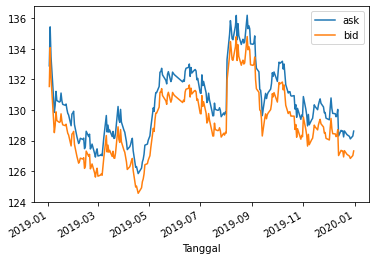

In [20]:
df.plot()

Berdasarkan kurva plot hasil pengolahan data di atas dapat dilihat mata uang Yen menunjukan trend positif terhadap rupiah selamat enam bulan mulai dari bulan maret sampai bulan september 2019. Yen pernah mengalami titik terendahnya yaitu pada bulan mei namun kemudian kembali menunjukkan keperkasaannya sampai pada bulan september. Bulan september merupakan puncak bagi Yen, setelah itu Yen kehilangan dominasinya dan menunjukkan trend menurun secara multiplikatif sampai akhir tahun 2019